In [1]:
%matplotlib widget
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, m_e, epsilon_0, k, pi, c
from pathlib import Path
%reload_ext autoreload

sys.path.append('../')
sys.path.append('../src')
sys.path.append('../utils')

%aimport src.source
%aimport src.plots
%aimport src.mpi_job
%aimport prod_figures 

from src.source import Simu
from src.plots import plot_max_abs, plot_profiles, SimuData, plot_Dn_over_ellipse
from utils.plotting import set_size, annotate_subplots
from src.mpi_job import frequency_scan, density_scan, temp_scan, angle_scan, compare_O_and_X_mode
from prod_figures import example_profiles, n_crit, f_ce, R_res, gamma, vthe, freq_variation, density

figp = Path('../figures')

In [23]:
%autoreload 1
simu = Simu(    'test',
                B0=1.4,
                R0=1.0,
                a0=0.25,
                harmonic=1,
                theta_in=np.pi/2 + 0.01,
                omega_b=78e9 * 2 * np.pi / 2,
                W0=0.02,
                Power_in=1,
                vmax=4,
                Nv=100,
                Nr=200,
                Ne0=2e18,
                Te0=7.0e3 * 1.602e-19,
                mode='O'
                )

In [24]:


print(n_crit(simu.omega_b))
f_ce(simu.B0, simu.R0, simu.R0 - simu.a0)/1e9, f_ce(simu.B0, simu.R0, simu.R0 + simu.a0)/1e9

1.8867132039009825e+19


(52.25264776168834, 31.351588657013)

In [18]:
%autoreload 1
simu.compute()

iR 101
iR 100
iR 99
iR 98
iR 97
iR 96
iR 95
iR 94
iR 93
iR 92
iR 91
iR 90
iR 89
iR 88
iR 87
iR 86
iR 85
iR 84
iR 83
iR 82
iR 81
iR 80
iR 79
iR 78
iR 77
iR 76
iR 75
iR 74
iR 73
iR 72
iR 71
iR 70
iR 69
iR 68
iR 67
iR 66
iR 65
iR 64
iR 63
iR 62
iR 61
iR 60
iR 59
iR 58
iR 57
iR 56
iR 55
iR 54
iR 53


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
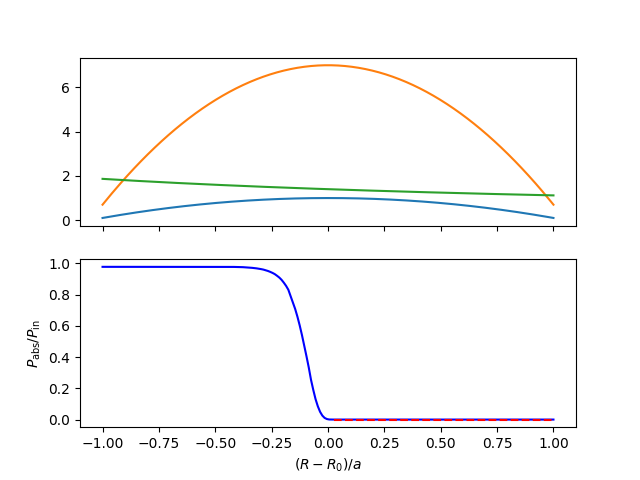

In [19]:
%autoreload 1
fig, axs = plt.subplots(2,1,sharex=True)
plot_profiles('test', axs=axs, show_analy=True, show_bounds=False)
_ = R_res(simu.harmonic, simu.B0, simu.R0, simu.omega_b, gamma=gamma(3*vthe(simu.Te0 / 1e3 / e)))
#axs[-1].axvline((_ - simu.R0) / simu.a0)

abs_bound.npy not found
abs_bound.npy not found


array([<AxesSubplot:>,
       <AxesSubplot:xlabel='$(R - R_0)/a$', ylabel='$P_\\mathrm{abs}/P_\\mathrm{in}$'>],
      dtype=object)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
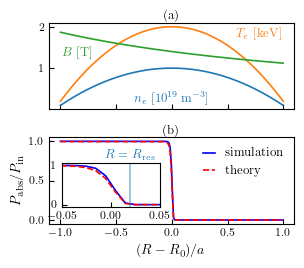

In [33]:
%autoreload 1
example_profiles()

### Study the impact of the Beam frequency

In [2]:
%aimport src.mpi_job
from src.mpi_job import frequency_scan, density_scan, temp_scan, angle_scan

abs_bound.npy not found
abs_bound.npy not found
abs_bound.npy not found
abs_bound.npy not found
abs_bound.npy not found


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
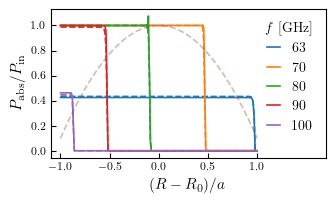

In [3]:
freq_variation()

### Density scan

['Ne0_0.2e19', 'Ne0_0.5e19', 'Ne0_1.0e19', 'Ne0_2.0e19']
abs_bound.npy not found
1.9997795074572284
abs_bound.npy not found
1.9997795074572284
abs_bound.npy not found
1.9997795074572284
abs_bound.npy not found
1.9997795074572284


<AxesSubplot:xlabel='$(R - R_0)/a$', ylabel='$P_\\mathrm{abs}/P_\\mathrm{in}$'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
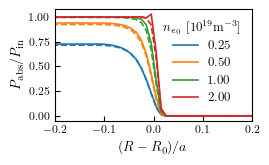

In [40]:
%autoreload 1
density()

### Temperature scan

1.0089233431680462
1.0275109497363435
1.047165253019626
1.06799234373399


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
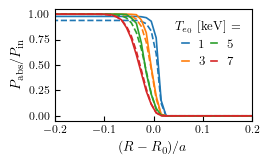

In [10]:
%autoreload 1
plt.style.use('../utils/tex.mplstyle')
simus = temp_scan(perp=True)

fs = set_size(width='article', fraction=0.8, aspect_r=0.5)
fig, ax = plt.subplots(figsize=fs)

#for i in range(len(simus)//2):
for i in range(len(simus)):
    
    simu = Simu.load_pickle(simus[i].name)
    T = simu.Te0
    T_label = '{:.0f}'.format(T / 1e3 / 1.602e-19) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    R_norm = (vec_R - simu.R0) / simu.a0
    Pow_norm = (vec_Power[-1] - vec_Power)/vec_Power[-1]
    
    l, = ax.plot(R_norm, Pow_norm, '-', label=T_label)
    ax.plot(R_norm, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$(R - R_0) / a$")
    ax.set_ylabel("$P_\mathrm{abs}/P_\mathrm{in}$")
    #ax.legend(["simulation","theory"])
    ax.legend(title='$T_{e_0}$ [keV] =', ncol=2, handlelength=0.5, columnspacing=0.5, frameon=False)
    
    ax.set_xlim(-0.5,0.5)
    
    #annot = '{}-mode\n'.format(simu.mode)
    #annot += r'$\theta_\mathrm{in}=\pi/2$'
    
    #ax.text(0.05, 0.05, annot, ha='left', va='bottom', transform=ax.transAxes)
    #ax.text()
    ax.set_xlim(-0.2, 0.2)
    
    gamm = gamma(3*vthe(simu.Te0 / 1e3 / e))
    print(gamm)
    lowb = R_res(simu.harmonic, simu.B0, simu.R0, simu.omega_b, gamma=gamma(3*vthe(simu.Te0 / 1e3 / e)))
    uppb = R_res(simu.harmonic, simu.B0, simu.R0, simu.omega_b, gamma=1)
    
    lowb = (lowb - simu.R0) / simu.a0
    uppb = (uppb - simu.R0) / simu.a0
    
    _2 = simu.abs_bounds[0]

    plt.tight_layout()
fig.savefig(figp / 'temp_scan_perp.pdf')

### Temp scan low dens

1.0089233431680462
1.0275109497363435
1.047165253019626
1.06799234373399


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
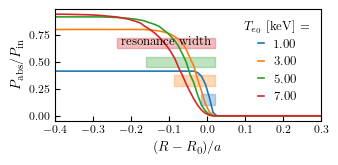

In [30]:
%autoreload 1
simus = temp_scan(perp=True)

fs = set_size(width='article', aspect_r=0.5)
fig, ax = plt.subplots(figsize=fs)

#for i in range(len(simus)//2):

for i in range(len(simus)):
    
    simu = Simu.load_pickle(simus[i].name)
    T = simu.Te0
    T_label = '{:.0f}'.format(T / 1e3 / 1.602e-19) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    R_norm = (vec_R - simu.R0) / simu.a0
    Pow_norm = (vec_Power[-1] - vec_Power)/vec_Power[-1]
    
    l, = ax.plot(R_norm, Pow_norm, '-', label=T_label)
    #ax.plot(R_norm, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$(R - R_0) / a$")
    ax.set_ylabel("$P_\mathrm{abs}/P_\mathrm{in}$")
    #ax.legend(["simulation","theory"])
    ax.legend(title='$T_{e_0}$ [keV] =', ncol=1, handlelength=0.5, columnspacing=0.5, frameon=False)
    
    ax.set_xlim(-0.4,0.3)
    
    #annot = '{}-mode\n'.format(simu.mode)
    #annot += r'$\theta_\mathrm{in}=\pi/2$'
    
    #ax.text(0.05, 0.05, annot, ha='left', va='bottom', transform=ax.transAxes)
    #ax.text()
    
    gamm = gamma(3*vthe(simu.Te0 / 1e3 / e))
    print(gamm)
    lowb = R_res(simu.harmonic, simu.B0, simu.R0, simu.omega_b, gamma=gamma(3*vthe(simu.Te0 / 1e3 / e)))
    uppb = R_res(simu.harmonic, simu.B0, simu.R0, simu.omega_b, gamma=1)
    
    lowb = (lowb - simu.R0) / simu.a0
    uppb = (uppb - simu.R0) / simu.a0
    
    _2 = simu.abs_bounds[0]
    
    #for _ in [lowb, uppb]:
    #    ax.axvline(_, color=l.get_color())
    
    ypos = i / len(simus) * 0.7 + 0.1
    dy = 0.1
    ax.fill_between(np.array([lowb, uppb]), y1=np.ones(2)*(ypos +dy), y2=np.ones(2)*ypos, 
                    alpha=0.3, color=l.get_color())
    if i==3:
        #ax.text(lowb, ypos+dy, '$3\,v_{\mathrm{th}_e}$', va='bottom', ha='center')
        #ax.text(uppb, ypos+dy, '$0\,v_{\mathrm{th}_e}$', va='bottom', ha='center')
        ax.text( (lowb + uppb)/2, ypos, 'resonance width', va='bottom', ha='center')
    #ax.set_ylim(top=1.4)
    
    plt.tight_layout()
fig.savefig(figp / 'temp_scan_perp_lowdens.pdf')

abs_bound.npy not found
abs_bound.npy not found
abs_bound.npy not found
abs_bound.npy not found


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
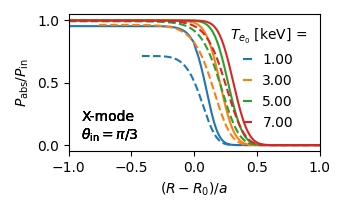

In [3]:
%autoreload 1
simus = temp_scan(perp=False)

fs = set_size(width='article')
fig, ax = plt.subplots(figsize=fs)

for i in range(len(simus)//2):
    
    simu = Simu.load_pickle(simus[2*i].name)
    T = simu.Te0
    T_label = '{:.2f}'.format(T / 1e3 / 1.602e-19) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    R_norm = (vec_R - simu.R0) / simu.a0
    
    l, = ax.plot(R_norm, (vec_Power[-1] - vec_Power)/vec_Power[-1], '-', label=T_label)
    ax.plot(R_norm, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$(R - R_0) / a$")
    ax.set_ylabel("$P_\mathrm{abs}/P_\mathrm{in}$")
    #ax.legend(["simulation","theory"])
    ax.legend(title='$T_{e_0}$ [keV] =', ncol=1, handlelength=0.5, columnspacing=0.5,
              loc='upper right', frameon=False)
    
    ax.set_xlim(-1.0,1.0)
    
    annot = '{}-mode\n'.format(simu.mode)
    annot += r'$\theta_\mathrm{in}=\pi/3$'
    
    ax.text(0.05, 0.05, annot, ha='left', va='bottom', transform=ax.transAxes)
    #ax.text()
    plt.tight_layout()
fig.savefig(figp / 'temp_scan_oblique.pdf')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
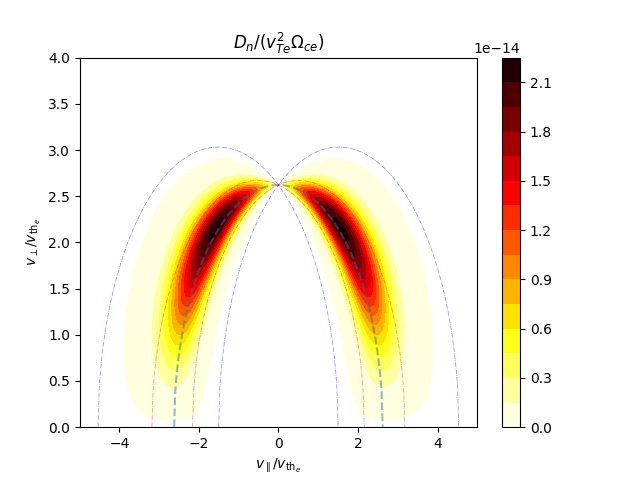

In [48]:
%autoreload 1
plt.style.use('default')
plot_Dn_over_ellipse('test4')

### Angle scan and velocity space

['theta_1.10', 'theta_1.26', 'theta_1.41', 'theta_1.57', 'theta_1.73', 'theta_1.88', 'theta_2.04']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
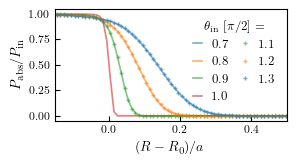

In [5]:
%autoreload 1
simus = angle_scan()

plt.style.use('../utils/tex.mplstyle')
fs = set_size(width='article', fraction=0.9, aspect_r=0.5)
fig, ax = plt.subplots(figsize=fs)

cols = []
for i in range(len(simus)):
    
    simu = Simu.load_pickle(simus[i].name)

    t = simu.theta_in
    t_label = '{:.1f}'.format(t / pi * 2) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    R_norm = (vec_R - simu.R0) / simu.a0
    
    if i <= len(simus)//2:
        ls = '-'
        l, = ax.plot(R_norm, (vec_Power[-1] - vec_Power)/vec_Power[-1], ls, label=t_label, alpha=0.6)
        cols.append(l.get_color())
    else:
        ls = '+'
        l, = ax.plot(R_norm, (vec_Power[-1] - vec_Power)/vec_Power[-1], ls, label=t_label, alpha=0.6, color=cols[2-i])
    
    #ax.plot(R_norm, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$(R - R_0)/a$")
    ax.set_ylabel("$P_\mathrm{abs}/P_\mathrm{in}$")
    #ax.legend(["simulation","theory"])
    ax.legend(title=r'$\theta_\mathrm{in}$ [$\pi/2$] =', handlelength=.7, loc='upper right',
              ncol=2, columnspacing=1.0)
    ax.set_xlim(-0.15,0.5)
    #ax.text()
plt.tight_layout()
#fig.savefig(figp / 'theta_variation_real_space.pdf')

['theta_1.10', 'theta_1.26', 'theta_1.41', 'theta_1.57', 'theta_1.73', 'theta_1.88', 'theta_2.04']
7.516277389499254e-12
4.615838848496301e-12
2.808649712115974e-12
1.9394058959326076e-11
2.8086497121159737e-12
4.615838848496285e-12
7.516277389499259e-12


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
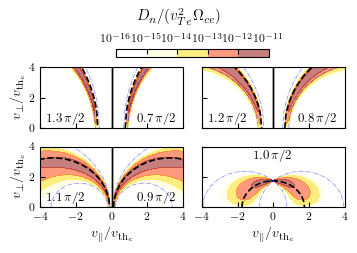

In [9]:
%autoreload 1
simus = angle_scan()
plt.style.use('../utils/tex.mplstyle')
fs = set_size(width='article', fraction=1, aspect_r=.7)
fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=fs, constrained_layout=True)

def get_max_Dn(simus):
    Dn_max = 0
    for i in range(len(simus)):
        simu = Simu.load_pickle(simus[i].name)
        #Compute the position of maximum absorption and compare it to the ellipse
        Dn = simu.Dn
        dP_on_dR = np.diff(simu.vec_Power)
        iR_max = np.argmax(dP_on_dR)
        # print("iR_max", iR_max)
        Z = np.transpose(Dn[iR_max,:,:])
        if np.nanmax(Z) > Dn_max:
            Dn_max = np.nanmax(Z)
    return Dn_max

vmax = get_max_Dn(simus)

k = np.array([0,1,2,3,2,1,0])
for i in range(7):
    simu = simus[i]
    ax = axs.flatten()[k[i]]
    if i > len(simus)//2:
        cbar = False
        xpos = 0.05
        ha = 'left'
    else:
        cbar = True
        xpos = 0.95
        ha = 'right'
        
    if k[i]<3:
        ypos = 0.05
        va = 'bottom'
    else:
        ypos = 0.95
        va = 'top'
    
    im = plot_Dn_over_ellipse(simu.name, ax=ax, labels=False, cbar=False, plot_ellipse=True, vmin=vmax/1e4, vmax=vmax)
    ax.set_xlim(-4,4)
    ax.set_ylim(0,4)
    
    if k[i]!=3:
        ax.axvline(0, color='black', lw=1)
    else:
        xpos = 0.5
        ha = 'center'
    
    
    # theta annotation
    t = simu.theta_in
    t_label = '{:.1f}$\,\pi/2$'.format(t / pi * 2) 
    ax.text(xpos, ypos, t_label, va=va, ha=ha, transform=ax.transAxes)
    
fig.colorbar(im, ax=axs[:,:], location='top', shrink=0.5)
fig.suptitle("$D_{n}/(v_{Te}^2 \Omega_{ce})$")

for ax in axs[-1,:]:
    ax.set_xlabel("$v_{\parallel} / v_{\mathrm{th}_e}$")
for ax in axs[:,0]:
    ax.set_ylabel("$v_{\perp} / v_{\mathrm{th}_e}$")
    
#axs[1,0].legend(handlelength=0.5, ncol=2, columnspacing=0.5)
#plt.tight_layout()
#fig.savefig(figp / 'Dn_vspace.pdf')

Showing the two lower figures only:

['theta_1.10', 'theta_1.26', 'theta_1.41', 'theta_1.57', 'theta_1.73', 'theta_1.88', 'theta_2.04']
2.808649712115974e-12
1.9394058959326076e-11
2.8086497121159737e-12


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
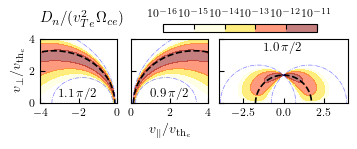

In [46]:
%autoreload 1
simus = angle_scan()
plt.style.use('../utils/tex.mplstyle')
fs = set_size(width='article', fraction=1, aspect_r=.4)
fig, axs = plt.subplots(1,3, sharex=False, sharey=True, figsize=fs, constrained_layout=True, 
                        gridspec_kw={'width_ratios' : [1.2,1.2,2]})

vmax = get_max_Dn(simus)

for i,k in zip([2,3,4], [1,2,0]) :
    simu = simus[i]
    ax = axs[k]
    
    im = plot_Dn_over_ellipse(simu.name, ax=ax, labels=False, cbar=False, plot_ellipse=True, vmin=vmax/1e4, vmax=vmax)
    ax.set_xlim(-4,4)
    ax.set_ylim(0,4)

    xpos = 0.5
    ha = 'center'
    if k==2:
        ypos = 0.95
        va = 'top'
    else:
        ypos = 0.05
        va = 'bottom'

    
    # theta annotation
    t = simu.theta_in
    t_label = '{:.1f}$\,\pi/2$'.format(t / pi * 2) 
    ax.text(xpos, ypos, t_label, va=va, ha=ha, transform=ax.transAxes)

axs[0].set_xlim(-4,0)
axs[1].set_xlim(0,4)
axs[2].set_xlim(-4,4)

fig.colorbar(im, ax=axs[:], location='top', shrink=0.5, anchor=(.8,1.0))
fig.suptitle("$D_{n}/(v_{Te}^2 \Omega_{ce})$", ha='left', va='center', x=.1, y=.9)

axs[1].set_xlabel("$v_{\parallel} / v_{\mathrm{th}_e}$")
axs[0].set_ylabel("$v_{\perp} / v_{\mathrm{th}_e}$")
    
#axs[1,0].legend(handlelength=0.5, ncol=2, columnspacing=0.5)
#plt.tight_layout()
fig.savefig(figp / 'Dn_vspace_revisited.pdf')

['theta_1.10', 'theta_1.26', 'theta_1.41', 'theta_1.57', 'theta_1.73', 'theta_1.88', 'theta_2.04']
2.808649712115974e-12
2.808649712115974e-12


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
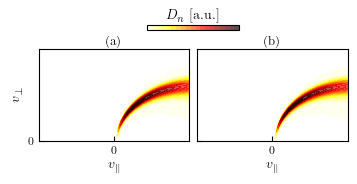

In [78]:
%autoreload 1
simus = angle_scan()
plt.style.use('../utils/tex.mplstyle')
#lt.style.use('default')
fs = set_size(width='article', fraction=1, aspect_r=.5)
fig, axs = plt.subplots(1,2, sharex=True, sharey=True,figsize=fs, constrained_layout=True)




for k in range(2):
    ax = axs[k]
    i = 2
    vmax = get_max_Dn([simus[i]])
    simu = simus[i]

    im = plot_Dn_over_ellipse(simu.name, ax=ax, labels=False, cbar=False, plot_ellipse=False, 
                              vmin=vmax/1e3, vmax=vmax, log_scale=False)
    ax.set_xlim(-3,3)
    ax.set_ylim(0,5)
    
    
    # theta annotation
    #t = simu.theta_in
    #t_label = '{:.1f}$\,\pi/2$'.format(t / pi * 2) 
    #ax.text(xpos, ypos, t_label, va=va, ha=ha, transform=ax.transAxes)
    if k==0:
        
        ax.set_ylabel("$v_{\perp}$")
        ax.set_yticks([0])
        ax.set_xticks([0])
    ax.set_xlabel("$v_{\parallel}$")

    
fig.colorbar(im, ax=axs, location='top', shrink=.3, label="$D_{n}$ [a.u.]", ticks=[])
#fig.suptitle("$D_{n}/(v_{Te}^2 \Omega_{ce})$")
annotate_subplots(axs, vpos=1.15)

    
#axs[1,0].legend(handlelength=0.5, ncol=2, columnspacing=0.5)
#plt.tight_layout()
fig.savefig(figp / 'Dn_inksc.svg')

['mode_compar_0', 'mode_compar_1', 'mode_compar_2', 'mode_compar_3', 'mode_compar_4', 'mode_compar_5']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
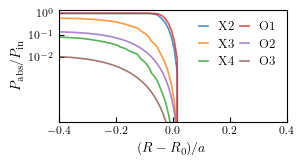

In [8]:
%autoreload 1
simus = compare_O_and_X_mode()
plt.style.use('../utils/tex.mplstyle')

fs = set_size(width='article', fraction=0.9, aspect_r=0.5)
fig, ax = plt.subplots(figsize=fs)

for i in range(len(simus)):
    
    simu = Simu.load_pickle(simus[i].name)

    mo = simu.mode
    har = simu.harmonic
    lab = '{}{}'.format(mo, har) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    R_norm = (vec_R - simu.R0) / simu.a0
    
    if mo=='O':
        ls = '-'
    elif mo=='X':
        ls = '-'

    l, = ax.plot(R_norm, (vec_Power[-1] - vec_Power)/vec_Power[-1], ls, label=lab, alpha=0.8)
       
    #ax.plot(R_norm, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$(R - R_0)/a$")
    ax.set_ylabel("$P_\mathrm{abs}/P_\mathrm{in}$")
    #ax.legend(["simulation","theory"])
    ax.legend(loc='upper right', ncol=2, handlelength=.7, columnspacing=0.5)
    ax.set_xlim(-0.4, 0.4)
    
    #ax.text()
    ax.set_yscale('log')
    ax.set_yticks([1, 0.1, 0.01])
    ax.set_ylim(bottom=1e-5)
plt.tight_layout()
#fig.savefig(figp / 'mode_comparison.pdf')

In [34]:
A = np.array([0.9, 1.1]) * pi/2
B = pi - A
A, B

(array([1.41371669, 1.72787596]), array([1.72787596, 1.41371669]))

np.array([0.9, 1.1